# **Compute and Networking**

## **AWS Compute**

**Understanding Servers**
The first building block you need to host an application is a server. Servers often times can handle Hypertext Transfer Protocol (HTTP) requests and send responses to clients following the client-server model, though any API based communication also falls under this model. A client being a person or computer that sends a request, and a server handling the requests is a computer, or collection of computers, connected to the internet serving websites to internet users. These servers power your application by providing CPU, memory, and networking capacity to process users’ requests and transform them into responses. For context, common HTTP servers include:

    Windows options, such as Internet Information Services (IIS).

    Linux options, such as Apache HTTP Web Server, Nginx, and Apache Tomcat.

To run an HTTP server on AWS, you need to find a service that provides compute power in the AWS Management Console. You can log into the console and view the complete list of AWS compute services.

![](2023-12-07-17-04-20.png)

**Choose the Right Compute Option**

If you’re responsible for setting up servers on AWS to run your infrastructure, you have many compute options. You need to know which service to use for which use case. At a fundamental level, there are three types of compute options: virtual machines, container services, and serverless. If you’re coming to AWS with prior infrastructure knowledge, a virtual machine can often be the easiest compute option in AWS to understand. This is because a virtual machine emulates a physical server and allows you to install an HTTP server to run your applications. To run these virtual machines, you install a hypervisor on a host machine. This hypervisor provisions the resources to create and run your virtual machines.In AWS, these virtual machines are called Amazon Elastic Compute Cloud or Amazon EC2. Behind the scenes, AWS operates and manages the host machines and the hypervisor layer. AWS also installs the virtual machine operating system, called the guest operating system.Some AWS compute services use Amazon EC2 or use virtualization concepts under the hood, therefore it is best to understand this service first before moving on to container services and serverless compute. 

![](2023-12-07-17-12-15.png)

![](2023-12-07-17-13-09.png)

![](2023-12-07-17-14-51.png)

![](2023-12-07-17-15-22.png)

![](2023-12-07-17-15-48.png)

**What Is Amazon EC2?**

 Amazon EC2 is a web service that provides secure, resizable compute capacity in the cloud. It allows you to provision virtual servers called EC2 instances. Although AWS uses the phrase “web service” to describe it, it doesn’t mean that you are limited to running just web servers on your EC2 instances. You can create and manage these instances through the AWS Management Console, the AWS Command Line Interface (CLI), AWS Software Development Kits (SDKs), or through automation tools and infrastructure orchestration services.In order to create an EC2 instance, you need to define:

    Hardware specifications, like CPU, memory, network, and storage.

    Logical configurations, like networking location, firewall rules, authentication, and the operating system of your choice.

When launching an EC2 instance, the first setting you configure is which operating system you want by selecting an Amazon Machine Image (AMI).

**What Is an AMI?**

In the traditional infrastructure world, the process of spinning up a server consists of installing an operating system from installation disks, installation drives, or installation wizards over the network. In the AWS Cloud, this operating system installation is no longer your responsibility, and is instead built into the AMI that you choose.Not only does an AMI let you configure which operating system you want, you can also select storage mappings, the architecture type (such as 32-bit, 64-bit, or 64-bit ARM), and additional software installed.

**What Is the Relationship Between AMIs and EC2 Instances?**

EC2 instances are live instantiations of what is defined in an AMI, much like a cake is a live instantiation of a cake recipe. If you are familiar with software development, you can also see this kind of relationship between a Class and an Object.

A Class is something you model and define, while an object is something you interact with. In this case, the AMI is how you model and define your instance, while the EC2 instance is the entity you interact with, where you can install your web server, and serve your content to users.When you launch a new instance, AWS allocates a virtual machine that runs on a hypervisor. Then the AMI you selected is copied to the root device volume, which contains the image used to boot the volume. In the end, you get a server you can connect to and install packages and any additional software. In this case, you install a web server along with the properly configured source code of your employee directory app. 

![](2023-12-07-17-24-25.png)

![](2023-12-07-17-25-20.png)

![](2023-12-07-17-27-36.png)

![](2023-12-07-17-32-52.png)

![](2023-12-07-17-33-42.png)

![](2023-12-07-17-50-22.png)

![](2023-12-07-17-51-09.png)

**Where Does Your EC2 Instance Live?**

By default, your EC2 instances are placed in a network called the default Amazon Virtual Private Cloud (VPC). This network was created so that you can easily get started with Amazon EC2 without having to learn how to create and configure a VPC. Any resource you put inside the default VPC will be public and accessible by the internet, so you shouldn’t place any customer data or private information inside of it. Once you get more comfortable with networking on AWS, you should change this default setting to choose your own custom VPCs and restrict access with additional routing and connectivity mechanisms. 

**Architect for High Availability**

Inside this network, your instance resides in an Availability Zone of your choice. AWS services that are scoped at the Availability Zone level must be architected with high availability in mind. While EC2 instances are typically reliable, two is better than one, and three is better than two. Specifying the instance size gives you an advantage when designing your architecture because you can use more smaller instances instead of a few larger ones. If your frontend only has a single instance and that instance fails, your application goes down. On the other hand, if your workload is distributed across 10 instances and one fails, you lose only 10 percent of your fleet and your application availability is hardly affected. When architecting any application for high availability, consider using at least two EC2 instances in two separate Availability Zones.
 ­­ 
**Explore the EC2 Instance Lifecycle**

An EC2 instance transitions between different states from the moment you create it all the way through to its termination. 

When you launch an instance, it enters the pending state (1). When the instance is pending, billing has not started. At this stage, the instance is preparing to enter the running state. Pending is where AWS performs all actions needed to set up an instance, such as copying the AMI content to the root device and allocating the necessary networking components. When your instance is running (2), it's ready to use. This is also the stage where billing begins. As soon as an instance is running, you are then able to take other actions on the instance, such as reboot, terminate, stop, and stop-hibernate. When you reboot an instance (3), it’s different than performing a stop action and then a start action. Rebooting an instance is equivalent to rebooting an operating system. The instance remains on the same host computer and maintains its public and private IP address, and any data on its instance store. It typically takes a few minutes for the reboot to complete. When you stop and start an instance (4), your instance may be placed on a new underlying physical server. Therefore, you lose any data on the instance store that were on the previous host computer. When you stop an instance, the instance gets a new public IP address but maintains the same private IP address. When you terminate an instance (5), the instance store are erased, and you lose both the public IP address and private IP address of the machine. Termination of an instance means you can no longer access the machine. 

**What Is the Difference Between Stop and Stop-Hibernate?**

When you stop your instance, it enters the stopping state, and then the stopped state. AWS does not charge usage or data transfer fees for your instance after you stop it, but storage for any Amazon EBS volumes is still charged. While your instance is in the stopped state, you can modify some attributes, like the instance type. When you stop your instance, the data stored in memory (RAM) is lost. When you stop-hibernate your instance, AWS signals the operating system to perform hibernation (suspend-to-disk), which saves the contents from the instance memory (RAM) to the Amazon EBS root volume. Consider a scenario where you build a standard three tier application, where you have web servers, application servers and database servers. Turns out, the application you built becomes extremely popular. To relieve some stress on the database that supports your application, you want to implement a custom backend layer that caches database information in memory (RAM). You decide to run this custom backend caching solution on Amazon EC2. In this scenario, the stop-hibernate feature would be instrumental in persisting storage. It would prevent you from having to manually create scripts to save this RAM data before shutting down the server. 

**What Makes Up the Pricing?**

To understand EC2 pricing, let’s decouple the instance price from other services attached to it, such as storage and networking costs. In this unit we refer to the instance cost as the cost associated with the instance in terms of specifications and not the total blended cost of running an instance. Once an instance is launched in your AWS account, the billing usually accrues on a per-second basis. For simplicity of calculation, prices are stated per-hour. For example, if you have an instance running for 5 minutes and 38 seconds during a given month, you only pay for 338 seconds of utilization at the end of the month. One exception to this pricing convention may be third-party AMIs purchased from the AWS Marketplace, which may have a minimum billing of 1 hour. For more details, check out the resources section of this unit. 

**What Are the EC2 Pricing Options?**

One of the ways to reduce costs with Amazon EC2 is to choose the right pricing option for the way your applications run. There are three main purchasing options for EC2 instances: on-demand, reserved, and spot instances. 

**Pay As You Go with On-Demand Instances**

With On-Demand instances, you pay for compute capacity with no long-term commitments. Billing begins whenever the instance is running, and billing stops when the instance is in a stopped or terminated state. The price per second for a running On-Demand instance is fixed. For applications that require servers to be running all the time, you are less likely to benefit from the On-Demand pricing model, simply because there is no situation where you will need to turn servers off. For example, you might want the web server hosting the frontend of your corporate directory application to be running 24/7 so that users can access the website at any time. Even if there are no users connected to your website, you don’t want to shut down the servers supporting the site in case of potential user activity. In the case when servers cannot be stopped, consider using a Reserved Instance to save on costs. 

**Reserve Capacity with Reserved Instances (RIs)**

RIs provide you with a significant discount compared to On-Demand instance pricing. RIs provide a discounted hourly rate and an optional capacity reservation for EC2 instances. You can choose between three payment options: All Upfront, Partial Upfront, or No Upfront. You can select either a 1-year or 3-year term for each of these options. Depending on which option you choose, you are discounted differently. 

    All Upfront offers a higher discount than Partial Upfront instances.

    Partial Upfront instances offer a higher discount than No Upfront.

    No Upfront offers a higher discount than On-Demand.

On-Demand and No Upfront are similar since both do not require any upfront payment. However, there is a major difference. When you choose an On-Demand instance, you stop paying for the instance when you stop or terminate the instance. When you stop an RI, you still pay for it because you committed to a 1-year or 3-year term. Reserved Instances are associated with an instance type and an Availability Zone depending on how you reserve it. The discount applied by a Reserved Instance purchase is not directly associated with a specific instance ID, but with an instance type.

**Save on Costs with Spot Instances**

Another way of paying for EC2 instances is by using Spot Instances. Amazon EC2 Spot Instances allow you to take advantage of unused EC2 capacity in the AWS Cloud. They are available at up to a 90% discount compared to On-Demand prices. With Spot Instances, you set a limit on how much you would like to pay for the instance hour. This is compared against the current Spot price that AWS determines. If the amount you pay is more than the current Spot price and there is capacity, then you will receive an instance. While they are very promising from the billing perspective, there are some architectural considerations you will need to consider in order to use them effectively. One consideration is that your spot instance may be interrupted. For example, if AWS determines that capacity is no longer available for a particular spot instance or if the Spot price exceeds how much you are willing to pay, AWS will give you a 2-minute warning before it interrupts your instance. That means any application or workload that runs on a Spot instance must be able to be interrupted. Because of this unique consideration, inherently fault-tolerant workloads are typically good candidates to use with Spot instances. These include big data, containerized workloads, continuous integration/continuous delivery (CI/CD), web servers, high-performance computing (HPC), image and media rendering, or other test and development workloads. 

![](2023-12-07-18-05-22.png)

![](2023-12-07-18-05-52.png)

![](2023-12-07-18-06-24.png)

![](2023-12-07-18-08-49.png)

![](2023-12-07-18-09-16.png)

![](2023-12-07-18-09-47.png)

![](2023-12-07-18-10-27.png)

![](2023-12-07-18-11-01.png)

![](2023-12-07-18-11-22.png)

![](2023-12-07-18-11-57.png)

![](2023-12-07-18-12-52.png)

![](2023-12-07-18-15-06.png)

![](2023-12-07-18-15-40.png)

![](2023-12-07-18-16-07.png)

![](2023-12-08-15-31-31.png)

![](2023-12-08-15-32-26.png)

![](2023-12-08-15-41-31.png)

![](2023-12-08-15-42-00.png)

![](2023-12-08-15-42-31.png)

![](2023-12-08-15-42-50.png)

![](2023-12-08-15-43-25.png)

![](2023-12-08-15-44-01.png)

![](2023-12-08-15-44-16.png)

![](2023-12-08-15-44-31.png)

![](2023-12-08-15-44-57.png)

**Reading 2.3: Container Services on AWS**

AWS offers a broad spectrum of compute offerings that give you the flexibility to choose the right tool for the right job. The three main categories of compute are virtual machines, containers, and serverless. There is no one-size-fits-all service because it depends on your needs.The key is to understand what each option has to offer in order to build a more appropriate cloud architecture for your use case. In this unit, you learn about containers and how to run them on AWS.Containers can host a variety of different workloads, including web applications, lift and shift migrations, distributed applications, and streamlining of development, test, and production environments.

**WHAT IS A CONTAINER?**

While containers are often referred to as a new technology, the idea started in the 1970s with certain Linux kernels having the ability to separate their processes through isolation. At the time, this was configured manually, making operations complex.With the evolution of the open source software community, containers evolved. Today, containers are used as a solution to problems of traditional compute, including the issue of getting software to run reliably when it moves from one compute environment to another.A container is a standardized unit that packages up your code and all of its dependencies. This package is designed to run reliably on any platform, because the container creates its own independent environment. This makes it easy to carry workloads from one place to another, such as from development to production or from on-premises to the cloud.

**WHAT IS DOCKER?**

When you hear the word container, you may associate it with Docker. Docker is a popular container runtime that simplifies the management of the entire operating system stack needed for container isolation, including networking and storage. Docker makes it easy to create, package, deploy, and run containers.



![](2023-12-08-15-57-44.png)

![](2023-12-08-15-58-36.png)

![](2023-12-08-15-59-25.png)

{    

     "family": "webserver",    

     "containerDefinitions": [ {        

          "name": "web",        

          "image": "nginx",        

          "memory": "100",        

          "cpu": "99"    

     } ],    

     "requiresCompatibilities": [ "FARGATE" ],    

     "networkMode": "awsvpc",    

     "memory": "512",    

     "cpu": "256"

}

**USE KUBERNETES WITH AMAZON ELASTIC KUBERNETES SERVICE (AMAZON EKS)**

Kubernetes is a portable, extensible, open source platform for managing containerized workloads and services. By bringing software development and operations together by design, Kubernetes created a rapidly growing ecosystem that is very popular and well established in the market.If you already use Kubernetes, you can use Amazon EKS to orchestrate these workloads in the AWS Cloud.Amazon EKS is conceptually similar to Amazon ECS, but there are some differences.

    An EC2 instance with the ECS Agent installed and configured is called a container instance. In Amazon EKS, it is called a worker node.

    An ECS Container is called a task. In the Amazon EKS ecosystem, it is called a pod.

    While Amazon ECS runs on AWS native technology, Amazon EKS runs on top of Kubernetes.

If you have containers running on Kubernetes and want an advanced orchestration solution that can provide simplicity, high availability, and fine-grained control over your infrastructure, Amazon EKS is the tool for you.

![](2023-12-08-16-11-08.png)

![](2023-12-08-16-11-22.png)

![](2023-12-08-16-11-36.png)

![](2023-12-08-16-12-08.png)

![](2023-12-08-16-12-25.png)

![](2023-12-08-16-12-38.png)

![](2023-12-08-16-13-35.png)

![](2023-12-08-16-19-12.png)

![](2023-12-08-16-20-00.png)

![](2023-12-08-16-20-34.png)

![](2023-12-08-16-21-02.png)

**You only need to define application content, networking, storage and scaling requirements.**

![](2023-12-08-16-24-44.png)

![](2023-12-08-16-28-06.png)

![](2023-12-08-16-31-21.png)

![](2023-12-08-16-31-46.png)

![](2023-12-08-16-32-37.png)

![](2023-12-08-16-34-50.png)

![](2023-12-08-16-35-18.png)

![](2023-12-08-16-35-34.png)

![](2023-12-08-16-35-48.png)

![](2023-12-08-16-36-02.png)

![](2023-12-08-16-36-28.png)

![](2023-12-08-16-36-47.png)

![](2023-12-08-16-37-04.png)

![](2023-12-08-16-37-34.png)

![](2023-12-08-16-38-29.png)

![](2023-12-08-16-39-10.png)

![](2023-12-08-16-39-33.png)

![](2023-12-08-16-40-17.png)

![](2023-12-08-16-41-04.png)

![](2023-12-08-16-41-38.png)

![](2023-12-08-16-41-54.png)

**Let's design a photo re-sizing app using Lambda ...**

![](2023-12-08-16-43-51.png)

![](2023-12-08-16-44-46.png)

![](2023-12-08-16-45-03.png)

![](2023-12-08-16-46-00.png)

![](2023-12-08-16-46-24.png)

![](2023-12-08-16-46-52.png)

![](2023-12-08-16-47-14.png)

![](2023-12-08-16-47-36.png)

![](2023-12-08-16-47-53.png)

![](2023-12-08-16-53-47.png)

![](2023-12-08-16-54-06.png)

![](2023-12-08-16-54-32.png)

![](2023-12-08-16-55-02.png)

![](2023-12-08-16-55-32.png)

![](2023-12-08-16-55-49.png)

![](2023-12-08-16-56-30.png)

![](2023-12-08-16-57-00.png)

![](2023-12-08-16-57-18.png)

![](2023-12-08-16-57-34.png)

![](2023-12-08-16-57-59.png)

![](2023-12-08-16-58-27.png)

![](2023-12-08-16-58-45.png)

![](2023-12-08-16-59-05.png)

![](2023-12-08-16-59-54.png)

![](2023-12-08-17-00-09.png)

![](2023-12-08-17-00-27.png)

![](2023-12-08-17-00-54.png)

![](2023-12-08-17-01-20.png)

![](2023-12-08-17-01-46.png)

![](2023-12-08-17-02-01.png)

![](2023-12-08-17-02-25.png)

![](2023-12-08-17-03-14.png)

![](2023-12-08-17-03-31.png)

![](2023-12-08-17-07-48.png)

![](2023-12-08-17-08-17.png)

![](2023-12-08-17-08-44.png)

![](2023-12-08-17-09-07.png)

![](2023-12-08-17-10-18.png)

![](2023-12-08-17-10-56.png)

![](2023-12-08-17-11-42.png)

![](2023-12-08-17-12-05.png)

![](2023-12-08-17-13-45.png)

![](2023-12-08-17-14-09.png)

![](2023-12-08-17-15-26.png)

![](2023-12-08-17-15-49.png)

![](2023-12-08-17-16-00.png)

![](2023-12-08-17-16-10.png)

![](2023-12-08-17-16-23.png)

![](2023-12-08-17-16-36.png)

![](2023-12-08-17-17-01.png)

![](2023-12-08-17-17-14.png)

![](2023-12-08-17-17-29.png)

![](2023-12-08-17-17-40.png)

**REMOVE THE UNDIFFERENTIATED HEAVY LIFTING**

If you run your code on Amazon EC2, AWS is responsible for the physical hardware and you are responsible for the logical controls, such as guest operating system, security and patching, networking, security, and scaling.If you run your code in containers on Amazon ECS and Amazon EKS, AWS is responsible for more of the container management, such as deploying containers across EC2 instances and managing the container cluster. However, when running ECS and EKS on EC2, you are still responsible for maintaining the underlying EC2 instances.If you want to deploy your workloads and applications without having to manage any EC2 instances, you can do that on AWS with serverless compute.

**GO SERVERLESS**

Every definition of serverless mentions four aspects.

    No servers to provision or manage.

    Scales with usage.

    You never pay for idle resources.

    Availability and fault tolerance are built-in.

With serverless, spend time on the things that differentiate your application, rather than spending time on ensuring availability, scaling, and managing servers.AWS has several serverless compute options, including AWS Fargate and AWS Lambda.

**EXPLORE SERVERLESS CONTAINERS WITH AWS FARGATE**

Amazon ECS and Amazon EKS enable you to run your containers in two modes.

    Amazon EC2 mode

    AWS Fargate mode

![](2023-12-08-22-58-16.png)

![](2023-12-08-22-59-23.png)

- You create the code from scratch.

- You use a blueprint that AWS provides.

- You use same code from the AWS Serverless Application Repository, a resource that contains sample applications, such as “hello world” code, Amazon Alexa Skill sample code, image resizing code, video encoding, and more.

When you create your Lambda function, you specify the runtime you want your code to run in. There are built-in runtimes such as Python, Node.js, Ruby, Go, Java, .NET Core, or you can implement your Lambda functions to run on a custom runtime.The configuration of a Lambda function consists of information that describes how the function should run. In the configuration, you specify network placement, environment variables, memory, invocation type, permission sets, and other configurations. To dive deeper into these configurations, check out the resources section of this unit.Triggers describe when the Lambda function should run. 

A trigger integrates your Lambda function with other AWS services, enabling you to run your Lambda function in response to certain API calls that occur in your AWS account. This makes you quicker to respond to events in your console without having to perform manual actions.All you need is the what, how, and when of a Lambda function to have functional compute capacity that runs only when you need it to.Amazon’s CTO, Werner Vogels, says, “No server is easier to manage than no server.” This quote summarizes the convenience you can have when running serverless solutions, like AWS Fargate and AWS Lambda. 

In the next unit, you apply all the information you’ve learned about Amazon EC2, Amazon ECS and Amazon EKS, and AWS Fargate and learn the use cases for each service.

**AWS Lambda function handler**

The AWS Lambda function handler is the method in your function code that processes events. When your function is invoked, Lambda runs the handler method. When the handler exits or returns a response, it becomes available to handle another event.You can use the following general syntax when creating a function handler in Python:

def handler_name(event, context):  ... return some_value

**NAMING**

The Lambda function handler name specified at the time you create a Lambda function is derived from the following:the name of the file in which the Lambda handler function is locatedthe name of the Python handler functionA function handler can be any name; however, the default on the Lambda console is lambda_function.lambda_handler. This name reflects the function name as lambda_handler, and the file where the handler code is stored in lambda_function.py.If you choose a different name for your function handler on the Lambda console, you must update the name on the Runtime settings pane.

**BILLING GRANULARITY**

AWS Lambda lets you run code without provisioning or managing servers, and you pay only for what you use. You are charged for the number of times your code is triggered (requests) and for the time your code executes, rounded up to the nearest 1ms (duration). AWS rounds up duration to the nearest millisecond with no minimum execution time. With this pricing, it can be very cost effective to run functions whose execution time is very low, such as functions with durations under 100ms or low latency APIs. For more information, see AWS News Blog.

**SOURCE CODE**

This video used a small amount of sample code illustrating a pattern for lazily generating assets using AWS Lambda and Amazon S3. If you’re looking to deploy a service to resize images to production, consider using the new release   Serverless Image Handler 

which is a robust solution to handle image manipulation and can be deployed via an AWS CloudFormation template.

You can find a tutorial on creating the AWS Lambda function as well as the code used in the AWS Lambda demo here: see AWS News Blog. 

## **AWS Networking**

![](2023-12-10-21-54-05.png)

![](2023-12-10-22-23-02.png)

![](2023-12-10-22-23-31.png)

![](2023-12-10-22-23-58.png)

**In this section, we focus on creating a custom built VPC, that is related to EC2 service. A Lambda function may not need a network at all.**

**WHAT IS NETWORKING?**

Networking is how you connect computers around the world and allow them to communicate with one another. In this trail, you’ve already seen a few examples of networking. One is the AWS global infrastructure. AWS has created a network of resources using data centers, Availability Zones, and Regions.

**KNOW THE NETWORKING BASICS**

Think about sending a letter. When sending a letter, there are three pieces of information you need.

    The payload or letter inside the envelope.

    The address of the sender in the From section.

    The address of the recipient in the To section.

Let’s go further. Each address must contain information such as:

    Name of sender and recipient

    Street

    City

    State or province

    Zip, area, or postal code

    Country

You need all parts of an address to ensure that your letter gets to its destination. Without the correct address, postal workers are not able to properly deliver the message. In the digital world, computers handle the delivery of messages in a similar way. This is called routing.

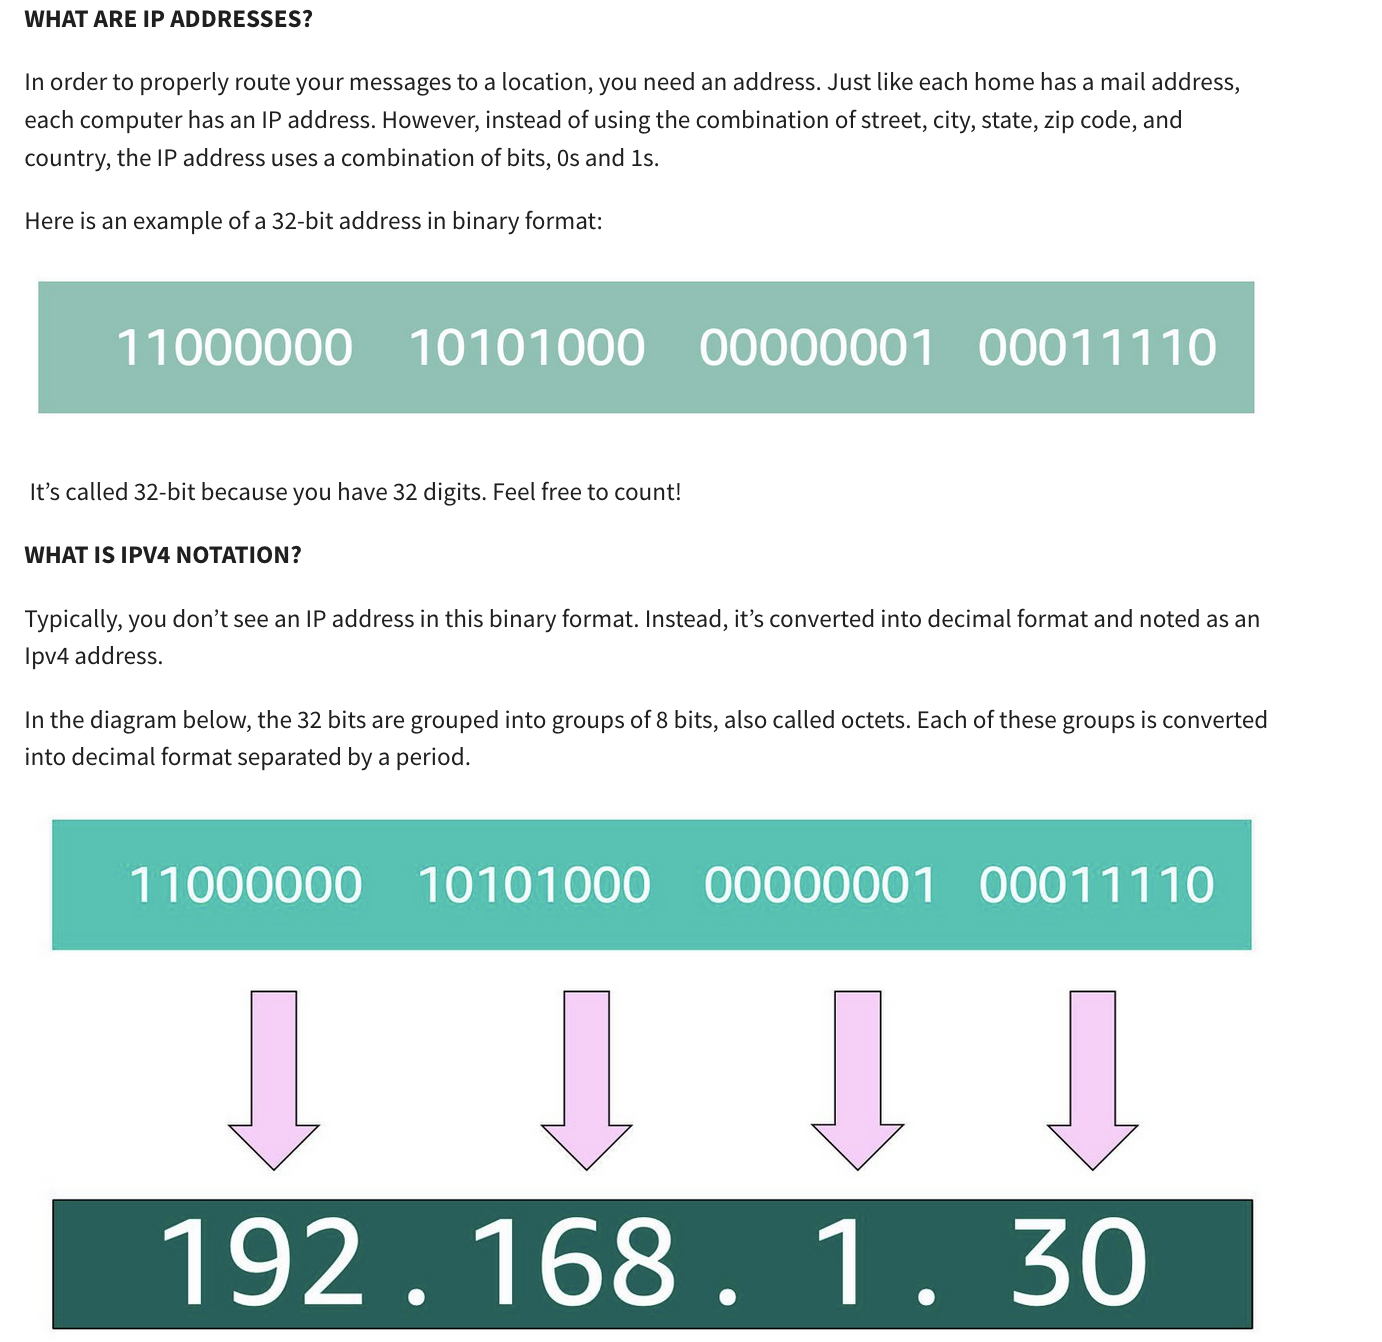

In the end, this is what is called an Ipv4 address. This is important to know when trying to communicate to a single computer. But remember, you’re working with a network. This is where CIDR Notation comes in.

**USE CIDR NOTATION**

192.168.1.30 is a single IP address. If you wanted to express IP addresses between the range of 192.168.1.0 and 192.168.1.255, how can you do that? 

One way is by using Classless Inter-Domain Routing (CIDR) notation. CIDR notation is a compressed way of specifying a range of IP addresses. Specifying a range determines how many IP addresses are available to you. 

CIDR notation looks like this: 

![](2023-12-10-22-36-40.png)

![](2023-12-10-23-21-25.png)

![](2023-12-10-23-22-20.png)

![](2023-12-10-23-24-29.png)

![](2023-12-10-23-26-16.png)

![](2023-12-10-23-28-19.png)

![](2023-12-10-23-29-59.png)

![](2023-12-12-09-03-06.png)

**Then click on Create VPC.**

![](2023-12-12-09-04-22.png)

![](2023-12-12-09-04-39.png)

![](2023-12-12-09-04-56.png)

**The purpose of these subnest is to have more granular control over access to resources.**

![](2023-12-12-09-06-11.png)

![](2023-12-12-09-06-34.png)

![](2023-12-12-09-07-00.png)

![](2023-12-12-09-07-20.png)

![](2023-12-12-09-07-56.png)

![](2023-12-12-09-10-37.png)

![](2023-12-12-09-10-55.png)

**Then click on Create Subnet.**

![](2023-12-12-09-16-16.png)

![](2023-12-12-09-16-41.png)

![](2023-12-12-09-17-04.png)

![](2023-12-12-09-17-26.png)

**Then click on Create Subnet.**

**Note:** Whatwever we put inside a subnet only has access inside that subnet. For websites like our corporate directory application, we want users to access site over internet, just like a modem:

![](2023-12-12-09-20-56.png)

![](2023-12-12-09-21-51.png)

![](2023-12-12-09-22-08.png)

![](2023-12-12-09-22-22.png)

![](2023-12-12-09-22-56.png)

![](2023-12-12-09-23-43.png)

![](2023-12-12-09-24-05.png)

![](2023-12-12-09-24-37.png)

**Then click Attach Internet Gateway.**

![](2023-12-12-09-25-48.png)

![](2023-12-12-09-26-06.png)

![](2023-12-12-09-26-17.png)

![](2023-12-12-09-26-30.png)

![](2023-12-12-09-26-46.png)

![](2023-12-12-09-27-16.png)

![](2023-12-12-09-27-32.png)

![](2023-12-12-09-27-44.png)

![](2023-12-12-09-27-54.png)

**How to make this design better?**

![](2023-12-12-09-28-58.png)

![](2023-12-12-09-29-12.png)

![](2023-12-12-09-29-34.png)

![](2023-12-12-09-29-47.png)

![](2023-12-12-09-30-04.png)

![](2023-12-12-09-33-51.png)

![](2023-12-12-11-54-21.png)

![](2023-12-12-11-54-47.png)

![](2023-12-12-11-55-22.png)

![](2023-12-12-12-16-43.png)

![](2023-12-12-12-23-11.png)

![](2023-12-12-12-23-29.png)

![](2023-12-12-12-23-48.png)

![](2023-12-12-12-24-14.png)

![](2023-12-12-12-24-39.png)

![](2023-12-12-12-25-13.png)

![](2023-12-12-12-25-50.png)

![](2023-12-12-12-26-25.png)

![](2023-12-12-12-26-58.png)

![](2023-12-12-12-27-17.png)

![](2023-12-12-12-27-54.png)

![](2023-12-12-12-28-53.png)

![](2023-12-12-12-29-03.png)

![](2023-12-12-12-29-25.png)

![](2023-12-12-12-29-36.png)

![](2023-12-12-12-29-58.png)

![](2023-12-12-12-30-08.png)

![](2023-12-12-12-30-48.png)

![](2023-12-12-12-31-08.png)

![](2023-12-12-12-31-39.png)

![](2023-12-12-12-31-56.png)

![](2023-12-12-12-32-17.png)

![](2023-12-12-12-32-31.png)

![](2023-12-12-12-33-01.png)

![](2023-12-12-12-33-11.png)

![](2023-12-12-12-33-27.png)

![](2023-12-12-12-33-40.png)

![](2023-12-12-12-34-08.png)

![](2023-12-12-12-36-50.png)

![](2023-12-12-12-37-01.png)

![](2023-12-12-12-37-14.png)

![](2023-12-12-12-37-28.png)

![](2023-12-12-12-37-48.png)

![](2023-12-12-12-38-33.png)

![](2023-12-12-12-39-12.png)

![](2023-12-12-12-39-40.png)

![](2023-12-12-12-40-41.png)

![](2023-12-12-12-40-55.png)

![](2023-12-12-12-41-06.png)

![](2023-12-12-12-40-18.png)

## **Exercise and Assessment**